In [31]:
import torch
import torch.nn as nn
import time

class SimpleTransformerModel(nn.Module):
    def __init__(self, n_layers, n_heads=8, d_model=1024, d_ff=2048):
        super(SimpleTransformerModel, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=n_heads, dim_feedforward=d_ff)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=n_layers)

    def forward(self, src):
        return self.transformer_encoder(src)

def measure_inference_time(model, data, device):
    model.eval()
    model.to(device)
    # start_time = time.time()
    with torch.no_grad():
        for i in range(50):  # Run multiple times for averaging
            if i == 10:
                start_time = time.time()
            _ = model(data)
    avg_time = (time.time() - start_time) / 10
    return avg_time

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")


# Print or process the results dictionary as needed


In [34]:
batch_sizes = [1, 2, 4, 8, 16]  # Example batch sizes
n_layers = [2, 12]  # Example layer configurations
d_model = 1024  # Example model dimension
seq_len = 512  # Example sequence length

results = {}
for layers in n_layers:
    for batch_size in batch_sizes:
        model = SimpleTransformerModel(n_layers=layers)
        data = torch.rand(seq_len, batch_size, d_model).to(device)
        avg_time = measure_inference_time(model, data, device) / batch_size * 1000
        results[(layers, batch_size)] = avg_time
        print(f"Layers: {layers}, Batch Size: {batch_size}, Avg batch Time: {avg_time:.3f} milliseconds")

Layers: 2, Batch Size: 1, Avg batch Time: 10.034 milliseconds
Layers: 2, Batch Size: 2, Avg batch Time: 3.383 milliseconds
Layers: 2, Batch Size: 4, Avg batch Time: 3.017 milliseconds
Layers: 2, Batch Size: 8, Avg batch Time: 3.225 milliseconds
Layers: 2, Batch Size: 16, Avg batch Time: 2.941 milliseconds
Layers: 12, Batch Size: 1, Avg batch Time: 56.485 milliseconds
Layers: 12, Batch Size: 2, Avg batch Time: 45.578 milliseconds
Layers: 12, Batch Size: 4, Avg batch Time: 35.350 milliseconds
Layers: 12, Batch Size: 8, Avg batch Time: 34.051 milliseconds
Layers: 12, Batch Size: 16, Avg batch Time: 32.248 milliseconds


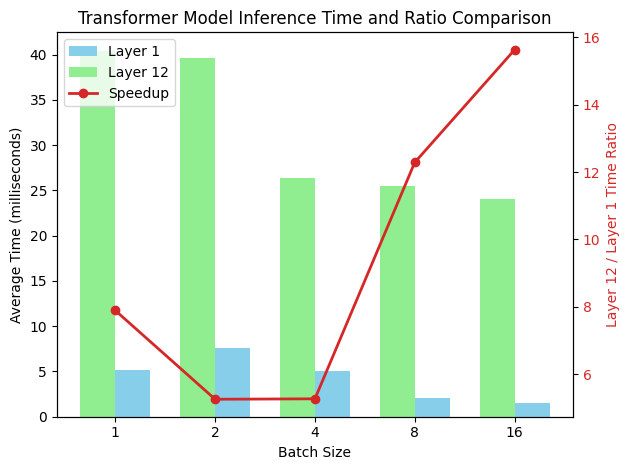

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
batch_sizes = [1, 2, 4, 8, 16]
times_layer_1 = [3.375, 1.689, 1.034, 0.334, 0.335]
times_layer_12 = [81.697, 24.511, 26.452, 25.560, 24.127]
ratios = np.array(times_layer_12) / np.array(times_layer_1)

# 设置
bar_width = 0.35  # 条形宽度
index = np.arange(len(batch_sizes))  # 每组数据的x坐标
# 绘制柱状图和时间比率变化线的完整脚本

fig, ax1 = plt.subplots()

# 绘制柱状图
bars_layer_1 = ax1.bar(index + bar_width/2, times_layer_1, bar_width, label='Layer 1', color='skyblue')
bars_layer_12 = ax1.bar(index - bar_width/2, times_layer_12, bar_width, label='Layer 12', color='lightgreen')

ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Average Time (milliseconds)')
ax1.tick_params(axis='y')
ax1.set_xticks(index)
ax1.set_xticklabels(batch_sizes)

# 在同一图表上创建第二个y轴来表示比率
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Layer 12 / Layer 1 Time Ratio', color=color)
ax2.plot(range(5), ratios, color=color, marker='o', linestyle='-', linewidth=2, label='Speedup')
ax2.tick_params(axis='y', labelcolor=color)

# 图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Transformer Model Inference Time and Ratio Comparison')
plt.tight_layout()
plt.show()


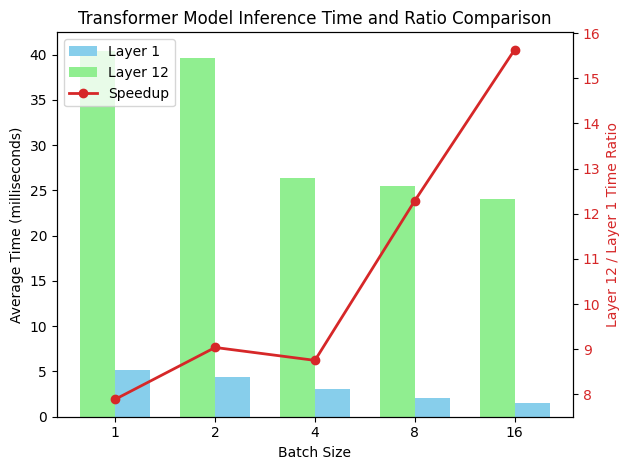

In [40]:
# layer 1 is actually layer 2
import matplotlib.pyplot as plt
import numpy as np

# 数据
batch_sizes = [1, 2, 4, 8, 16]
times_layer_1 = [5.126, 4.383, 3.017, 2.072, 1.538]
times_layer_12 = [40.449, 39.613, 26.404, 25.458, 24.039]
ratios = np.array(times_layer_12) / np.array(times_layer_1)

# 设置
bar_width = 0.35  # 条形宽度
index = np.arange(len(batch_sizes))  # 每组数据的x坐标
# 绘制柱状图和时间比率变化线的完整脚本

fig, ax1 = plt.subplots()

# 绘制柱状图
bars_layer_1 = ax1.bar(index + bar_width/2, times_layer_1, bar_width, label='Layer 1', color='skyblue')
bars_layer_12 = ax1.bar(index - bar_width/2, times_layer_12, bar_width, label='Layer 12', color='lightgreen')

ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Average Time (milliseconds)')
ax1.tick_params(axis='y')
ax1.set_xticks(index)
ax1.set_xticklabels(batch_sizes)

# 在同一图表上创建第二个y轴来表示比率
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Layer 12 / Layer 1 Time Ratio', color=color)
ax2.plot(range(5), ratios, color=color, marker='o', linestyle='-', linewidth=2, label='Speedup')
ax2.tick_params(axis='y', labelcolor=color)

# 图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Transformer Model Inference Time and Ratio Comparison')
plt.tight_layout()
# plt.show()


In [41]:
plt.savefig('figs/test_batch.pdf')

<Figure size 640x480 with 0 Axes>

In [5]:
import torch
import torch.nn as nn
import time
import subprocess
import re
import numpy as np

class SimpleTransformerModel(nn.Module):
    def __init__(self, n_layers, n_heads=8, d_model=1024, d_ff=2048):
        super(SimpleTransformerModel, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=n_heads, dim_feedforward=d_ff)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=n_layers)

    def forward(self, src):
        return self.transformer_encoder(src)

    def calculate_params(self):
        return sum(p.numel() for p in self.parameters())

def measure_inference_time(model, data, device):
    model.eval()
    model.to(device)
    # start_time = time.time()
    gpu_utlization_list = []
    with torch.no_grad():
        for i in range(50):  # Run multiple times for averaging
            if i == 10:
                start_time = time.time()
            _ = model(data)
            gpu_utilization = get_gpu_utilization_nvidia_smi()
            gpu_utlization_list.append(gpu_utilization)
    avg_time = (time.time() - start_time) / 10
    return avg_time, np.array(gpu_utlization_list).mean()

def get_gpu_utilization_nvidia_smi():
    # 使用nvidia-smi命令获取GPU状态信息
    nvidia_smi_output = subprocess.check_output(['nvidia-smi', '-i', '4', '--query-gpu=utilization.gpu', '--format=csv,noheader,nounits'], encoding='utf-8')
    
    # 解析输出以获得GPU使用率，nvidia-smi通常返回一个百分比值
    gpu_utilization_match = re.search(r'\d+', nvidia_smi_output)
    if gpu_utilization_match:
        gpu_utilization = int(gpu_utilization_match.group())
        return gpu_utilization
    else:
        # 如果解析失败，返回None或其他适当的错误处理方式
        return None


device = torch.device("cuda:4" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")


# Print or process the results dictionary as needed
batch_sizes = [1, 2, 4, 8, 16]  # Example batch sizes
n_layers = range(1, 12)  # Example layer configurations
d_model = 1024  # Example model dimension
seq_len = 512  # Example sequence length

results = {}
for layers in n_layers:
    for batch_size in batch_sizes:
        model = SimpleTransformerModel(n_layers=layers)
        print(f"Layers: {layers}, Batch Size: {batch_size}")
        print(f"Model Parameters: {model.calculate_params()}")
        data = torch.rand(seq_len, batch_size, d_model).to(device)
        total_time, gpu_utilization = measure_inference_time(model, data, device) 
        avg_time = total_time / batch_size * 1000
        results[(layers, batch_size)] = avg_time
        print(f"Avg batch Time: {avg_time:.3f} milliseconds, GPU Utilization: {gpu_utilization:.2f}%")

Layers: 1, Batch Size: 1
Model Parameters: 16799744
Avg batch Time: 1124.006 milliseconds, GPU Utilization: 0.00%
Layers: 1, Batch Size: 2
Model Parameters: 16799744
Avg batch Time: 561.273 milliseconds, GPU Utilization: 0.74%
Layers: 1, Batch Size: 4
Model Parameters: 16799744
Avg batch Time: 268.126 milliseconds, GPU Utilization: 0.80%
Layers: 1, Batch Size: 8
Model Parameters: 16799744
Avg batch Time: 138.248 milliseconds, GPU Utilization: 1.94%
Layers: 1, Batch Size: 16
Model Parameters: 16799744
Avg batch Time: 77.283 milliseconds, GPU Utilization: 3.38%
Layers: 2, Batch Size: 1
Model Parameters: 25199616
Avg batch Time: 1114.595 milliseconds, GPU Utilization: 0.82%
Layers: 2, Batch Size: 2
Model Parameters: 25199616
Avg batch Time: 564.481 milliseconds, GPU Utilization: 0.76%
Layers: 2, Batch Size: 4
Model Parameters: 25199616
Avg batch Time: 257.855 milliseconds, GPU Utilization: 2.28%
Layers: 2, Batch Size: 8
Model Parameters: 25199616
Avg batch Time: 131.486 milliseconds, GPU 